In [1]:
# Import necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

# Machine learning models
import lightgbm as lgb
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.tree import plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.inspection import permutation_importance

# Data preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Data splitting
from sklearn.model_selection import train_test_split, learning_curve

# Evaluation metrics
from sklearn.metrics import (
    accuracy_score,
    mean_absolute_error,
    mean_absolute_percentage_error,
    mean_squared_error, 
    r2_score, 
    classification_report, 
    roc_auc_score, 
    roc_curve,
    precision_recall_curve,
    confusion_matrix,
    auc
)

# Handling imbalance
from imblearn.over_sampling import SMOTE

In [2]:
# Download latest version
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\jasmi\.cache\kagglehub\datasets\mlg-ulb\creditcardfraud\versions\3


In [3]:
file_path = r"C:\Users\jasmi\.cache\kagglehub\datasets\mlg-ulb\creditcardfraud\versions\3\creditcard.csv"

df = pd.read_csv(file_path)
df = df.groupby('Class', group_keys=False).apply(lambda x: x.sample(frac=0.07, random_state=42)).reset_index(drop=True)
display(df)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,82450.0,1.314539,0.590643,-0.666593,0.716564,0.301978,-1.125467,0.388881,-0.288390,-0.132137,...,-0.170307,-0.429655,-0.141341,-0.200195,0.639491,0.399476,-0.034321,0.031692,0.76,0
1,50554.0,-0.798672,1.185093,0.904547,0.694584,0.219041,-0.319295,0.495236,0.139269,-0.760214,...,0.202287,0.578699,-0.092245,0.013723,-0.246466,-0.380057,-0.396030,-0.112901,4.18,0
2,55125.0,-0.391128,-0.245540,1.122074,-1.308725,-0.639891,0.008678,-0.701304,-0.027315,-2.628854,...,-0.133485,0.117403,-0.191748,-0.488642,-0.309774,0.008100,0.163716,0.239582,15.00,0
3,116572.0,-0.060302,1.065093,-0.987421,-0.029567,0.176376,-1.348539,0.775644,0.134843,-0.149734,...,0.355576,0.907570,-0.018454,-0.126269,-0.339923,-0.150285,-0.023634,0.042330,57.00,0
4,90434.0,1.848433,0.373364,0.269272,3.866438,0.088062,0.970447,-0.721945,0.235983,0.683491,...,0.103563,0.620954,0.197077,0.692392,-0.206530,-0.021328,-0.019823,-0.042682,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19931,93853.0,-5.839192,7.151532,-12.816760,7.031115,-9.651272,-2.938427,-11.543207,4.843627,-3.494276,...,2.462056,1.054865,0.530481,0.472670,-0.275998,0.282435,0.104886,0.254417,316.06,1
19932,29531.0,-1.060676,2.608579,-2.971679,4.360089,3.738853,-2.728395,1.987616,-0.357345,-2.757535,...,-0.063168,-0.207385,-0.183261,-0.103679,0.896178,0.407387,-0.130918,0.192177,0.68,1
19933,92092.0,-1.108478,3.448953,-6.216972,3.021052,-0.529901,-2.551375,-2.001743,1.092432,-0.836098,...,0.825951,1.144170,0.208559,-0.295497,-0.690232,-0.364749,0.229327,0.208830,18.00,1
19934,142840.0,-3.613850,-0.922136,-4.749887,3.373001,-0.545207,-1.171301,-4.172315,1.517016,-1.775833,...,0.786787,0.893065,1.034907,0.097671,-1.345551,-0.788329,1.055442,0.099971,144.80,1


In [4]:
df['Class'].value_counts(normalize=True)

Class
0    0.998295
1    0.001705
Name: proportion, dtype: float64

In [5]:
df['normAmount'] = StandardScaler().fit_transform(df[['Amount']])
df = df.drop(['Amount', 'Time'], axis=1)

In [6]:
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [7]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

In [9]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(scale_pos_weight=1, use_label_encoder=False, eval_metric='logloss', random_state=42),
    "SVM": SVC(class_weight='balanced', probability=True, random_state=42)
}

In [10]:
# Store for PR and ROC plots
pr_curves = {}
roc_curves = {}
scores_summary = []

In [11]:
# Train, evaluate and collect metrics
for name, model in models.items():
    print(f"\nTraining: {name}")
    model.fit(X_resampled, y_resampled)

    # Predict probabilities or decision scores
    y_scores = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test_scaled)
    y_pred = model.predict(X_test_scaled)

    # Precision, Recall, F1
    report = classification_report(y_test, y_pred, output_dict=True)
    scores_summary.append({
        "Model": name,
        "Precision": report["1"]["precision"],
        "Recall": report["1"]["recall"],
        "F1-score": report["1"]["f1-score"]
    })

    # Precision-Recall curve
    precision, recall, _ = precision_recall_curve(y_test, y_scores)
    pr_auc = auc(recall, precision)
    pr_curves[name] = (recall, precision, pr_auc)

    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    roc_curves[name] = (fpr, tpr, roc_auc)


Training: Logistic Regression

Training: Random Forest

Training: XGBoost


C:\Users\jasmi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [11:02:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Training: SVM


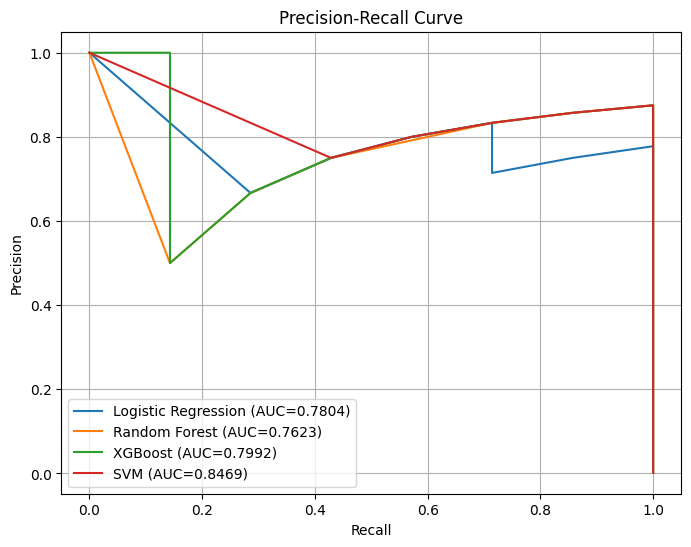

In [12]:
# --- Plot Precision-Recall Curves ---
plt.figure(figsize=(8, 6))
for name, (recall, precision, pr_auc) in pr_curves.items():
    plt.plot(recall, precision, label=f"{name} (AUC={pr_auc:.4f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid(True)
plt.show()

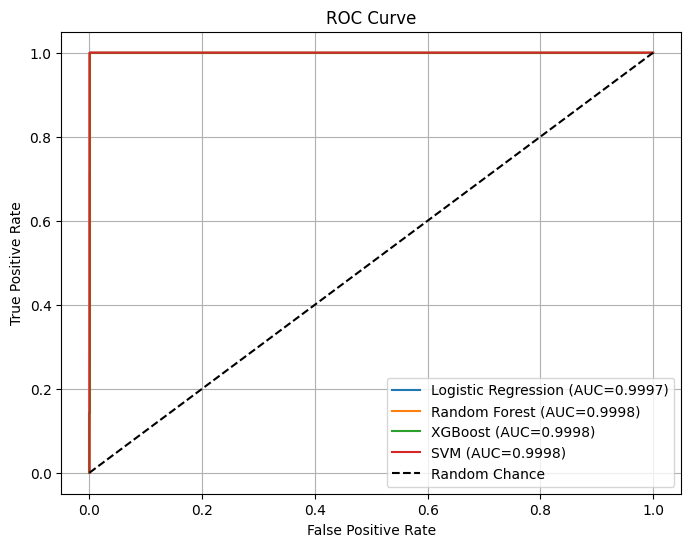

In [13]:
# --- Plot ROC Curves ---
plt.figure(figsize=(8, 6))
for name, (fpr, tpr, roc_auc) in roc_curves.items():
    plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc:.4f})")
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

In [14]:
# --- Print Summary Table ---
summary_df = pd.DataFrame(scores_summary)
print("\nModel Performance Summary (on Fraud Class):")
print(summary_df.to_string(index=False, float_format="%.4f"))


Model Performance Summary (on Fraud Class):
              Model  Precision  Recall  F1-score
Logistic Regression     0.4375  1.0000    0.6087
      Random Forest     0.7778  1.0000    0.8750
            XGBoost     0.7778  1.0000    0.8750
                SVM     0.5833  1.0000    0.7368


In [18]:
def evaluation_dashboard(model, X_test_scaled, y_test, model_name="Model"):
    print(f"\n==== {model_name} Detailed Evaluation ====")

    # Get scores
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test_scaled)[:, 1]
    else:
        y_scores = model.decision_function(X_test_scaled)

    # 1. Threshold vs Metrics Plot
    precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)

    plt.figure(figsize=(7, 5))
    plt.plot(thresholds, precision[:-1], label='Precision')
    plt.plot(thresholds, recall[:-1], label='Recall')
    plt.plot(thresholds, f1_scores[:-1], label='F1 Score')
    plt.title(f'{model_name} - Threshold vs Metrics')
    plt.xlabel('Threshold')
    plt.ylabel('Score')
    plt.legend()
    plt.grid(True)
    plt.show()

    # 2. Lift Chart
    sorted_indices = np.argsort(y_scores)[::-1]
    y_sorted = np.array(y_test)[sorted_indices]

    cumulative_true = np.cumsum(y_sorted)
    total_positives = np.sum(y_test)
    perc_total = np.arange(1, len(y_test) + 1) / len(y_test)

    lift = cumulative_true / (perc_total * total_positives)

    plt.figure(figsize=(7, 5))
    plt.plot(perc_total[:1000], lift[:1000], label='Lift Curve')
    plt.axhline(1, color='red', linestyle='--', label='Baseline')
    plt.title(f'{model_name} - Lift Chart')
    plt.xlabel('% of Data (sorted by score)')
    plt.ylabel('Lift')
    plt.legend()
    plt.grid(True)
    plt.show()

    # 3. Feature Importances (Tree models only)
    if hasattr(model, "feature_importances_"):
        importances = model.feature_importances_
        features = [f"V{i}" for i in range(X_test_scaled.shape[1])]
        sorted_idx = np.argsort(importances)[::-1]

        plt.figure(figsize=(7, 5))
        sns.barplot(x=importances[sorted_idx][:10], y=np.array(features)[sorted_idx][:10])
        plt.title(f'{model_name} - Top 10 Feature Importances')
        plt.xlabel('Importance')
        plt.grid(True)
        plt.show()



==== Logistic Regression Detailed Evaluation ====


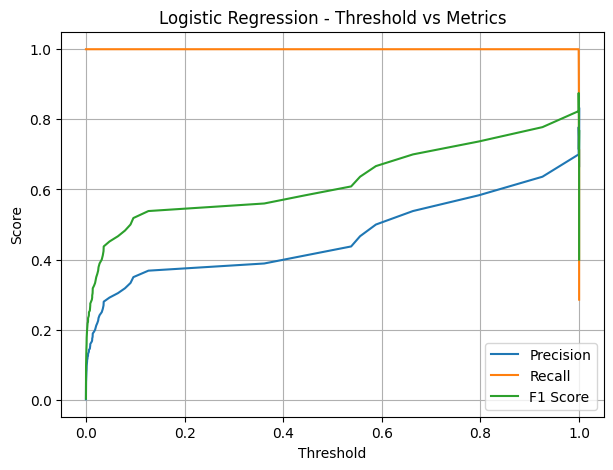

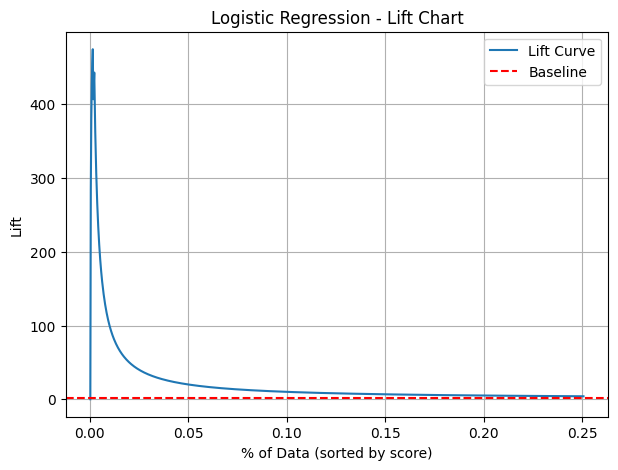


==== Random Forest Detailed Evaluation ====


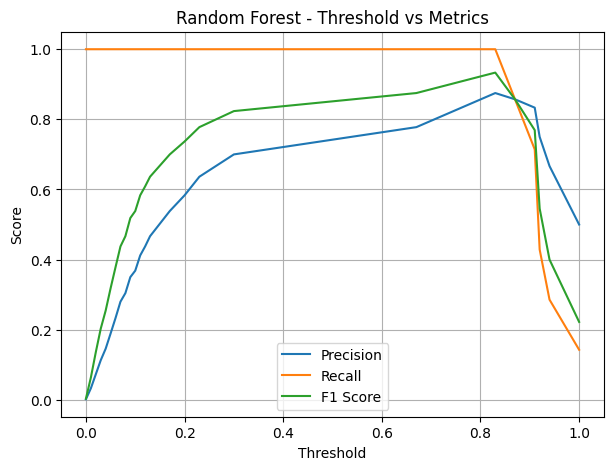

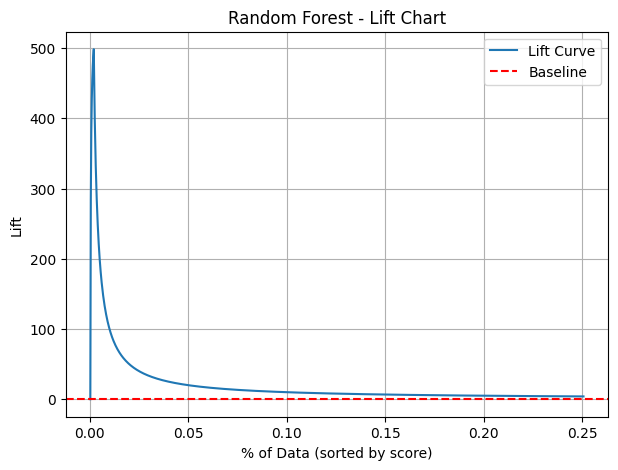

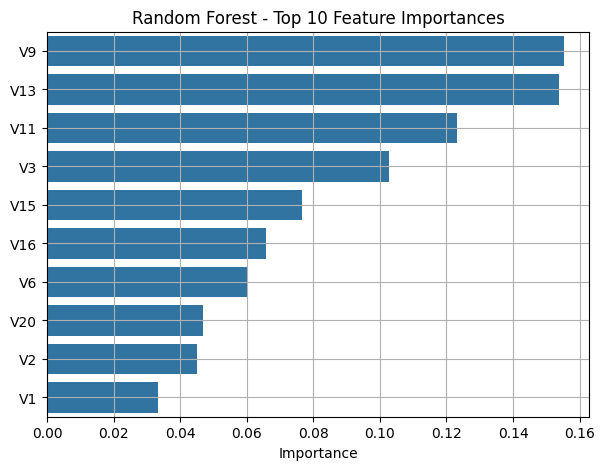


==== XGBoost Detailed Evaluation ====


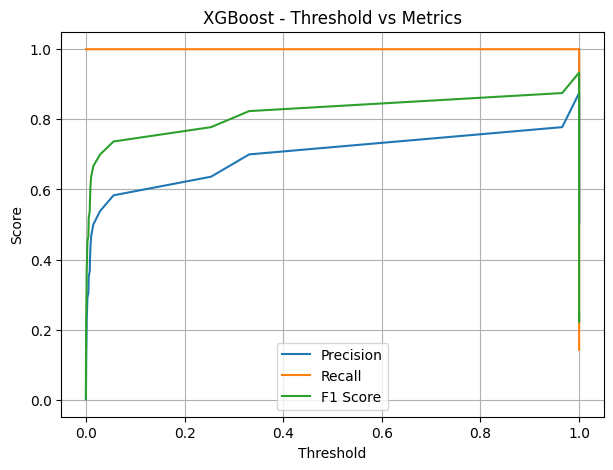

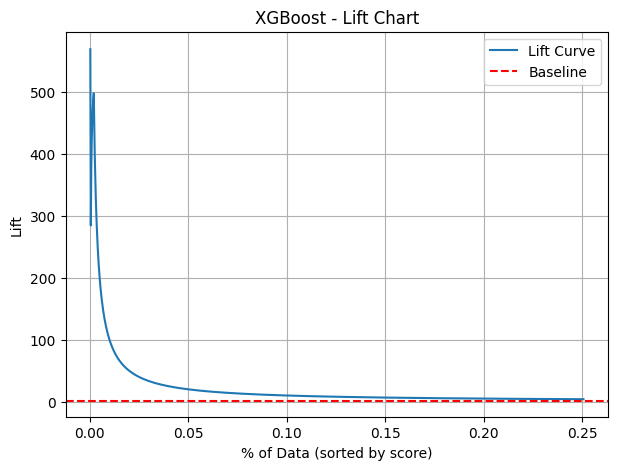

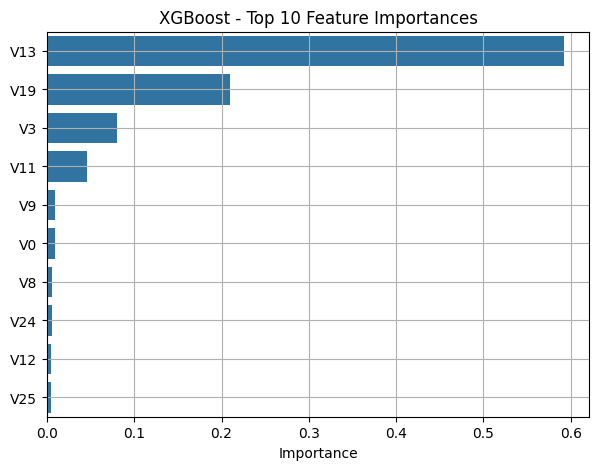


==== SVM Detailed Evaluation ====


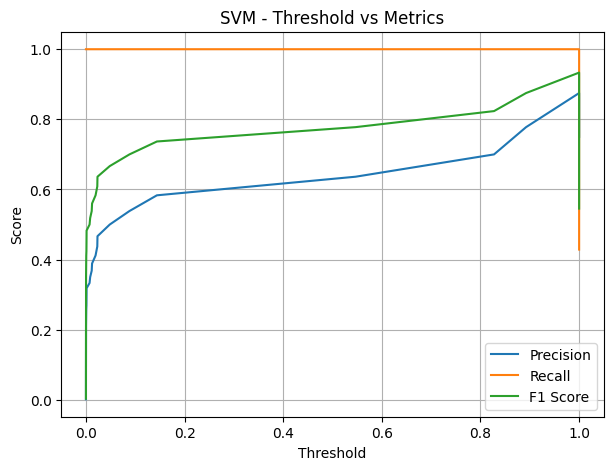

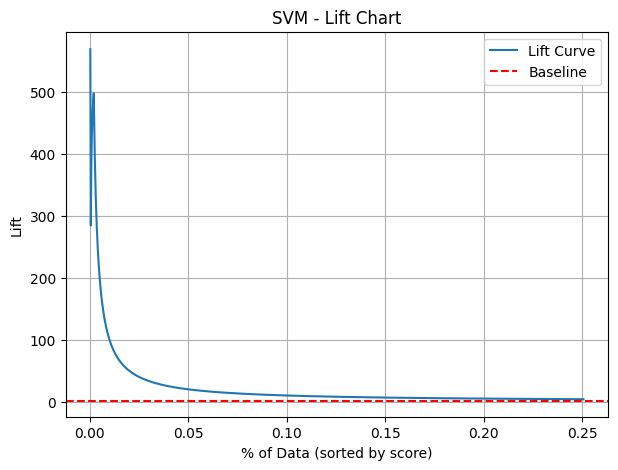

In [20]:
# Run for each model
for name, model in models.items():
    evaluation_dashboard(model, X_test_scaled, y_test, model_name=name)